<a href="https://colab.research.google.com/github/aa10sh/demorepo/blob/main/dropout_risk_pridction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Dropout Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**Dummy Dataset generated by chat gpt**

In [3]:
df=pd.read_csv("student_dropout_dataset_india.csv")

In [4]:
df.head()

,family_income,previous_year_marks,attendance_rate,parent_education_level_father,distance_to_school_km,gender,school_infrastructure_score,motivation_level,migration_status,parent_occupation_father,mental_health_status,iq_score,dropout_status
0,126958,38.938861,56.911286,Primary,9.653100,Female,2,4,0,Daily Wage Laborer,Normal,103,1
1,136932,52.169313,47.089890,Secondary,10.439832,Male,1,1,0,Farmer,Mild Stress,139,1
2,108694,37.375779,81.804230,Postgraduate,8.186594,Female,2,5,0,Farmer,Mild Stress,107,1
3,124879,90.105085,77.736571,Secondary,3.851806,Male,4,2,0,Farmer,Normal,120,0
4,115268,87.027058,92.648321,Primary,5.250870,Male,4,5,0,Self-employed,Normal,115,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   family_income                  200 non-null    int64  
 1   previous_year_marks            200 non-null    float64
 2   attendance_rate                200 non-null    float64
 3   parent_education_level_father  200 non-null    object 
 4   distance_to_school_km          200 non-null    float64
 5   gender                         200 non-null    object 
 6   school_infrastructure_score    200 non-null    int64  
 7   motivation_level               200 non-null    int64  
 8   migration_status               200 non-null    int64  
 9   parent_occupation_father       200 non-null    object 
 10  mental_health_status           200 non-null    object 
 11  iq_score                       200 non-null    int64  
 12  dropout_status                 200 non-null    int

**4 Columns are object and rest are int or float**

In [6]:
df.describe()

,family_income,previous_year_marks,attendance_rate,distance_to_school_km,school_infrastructure_score,motivation_level,migration_status,iq_score,dropout_status
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,82219.550000,62.519011,72.784325,7.099899,2.985000,2.975000,0.145000,109.300000,0.685000
std,42720.165466,19.164405,18.170814,4.257466,1.379962,1.474873,0.352984,17.415986,0.465682
min,5769.000000,30.329003,40.650259,0.169017,1.000000,1.000000,0.000000,80.000000,0.000000
25%,45173.750000,46.041717,59.012028,3.283857,2.000000,2.000000,0.000000,94.750000,0.000000
50%,88638.000000,64.839667,74.031276,6.847676,3.000000,3.000000,0.000000,109.000000,1.000000
75%,121623.250000,77.387777,88.787471,10.193359,4.000000,4.000000,0.000000,124.250000,1.000000
max,148760.000000,94.353500,99.983060,14.953426,5.000000,5.000000,1.000000,139.000000,1.000000


**Feature Encoding of Categorical Data**

In [8]:
cat_col=["parent_education_level_father","gender","parent_occupation_father","mental_health_status"]

In [9]:
le_dict={}
for col in cat_col:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    le_dict[col]=le

**Standar Scaling of numerical data**

In [10]:
num_cols = ["family_income","previous_year_marks","attendance_rate","distance_to_school_km",
            "school_infrastructure_score","motivation_level","iq_score"]
scaler = StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

**Dataframe after Endcoding & Scaling**

In [11]:
df.sample(5)

,family_income,previous_year_marks,attendance_rate,parent_education_level_father,distance_to_school_km,gender,school_infrastructure_score,motivation_level,migration_status,parent_occupation_father,mental_health_status,iq_score,dropout_status
94,-0.585817,1.404113,1.141180,4,-0.214222,1,0.737373,-0.662733,0,1,3,-1.110958,1
48,0.781223,-0.364485,1.129796,0,-0.430982,0,0.737373,0.696719,0,2,2,-0.650457,1
44,1.008007,-0.450789,-0.172086,4,-0.251291,0,-1.442055,-1.342458,0,0,3,-0.017269,1
112,1.060456,-1.574110,0.244058,4,1.353952,0,0.010897,0.696719,0,3,3,1.479359,1
103,0.845570,-0.424039,-0.304097,3,-1.579118,1,1.463849,1.376445,0,1,3,-0.477770,1


**Heatmap showing co relation among attributes**

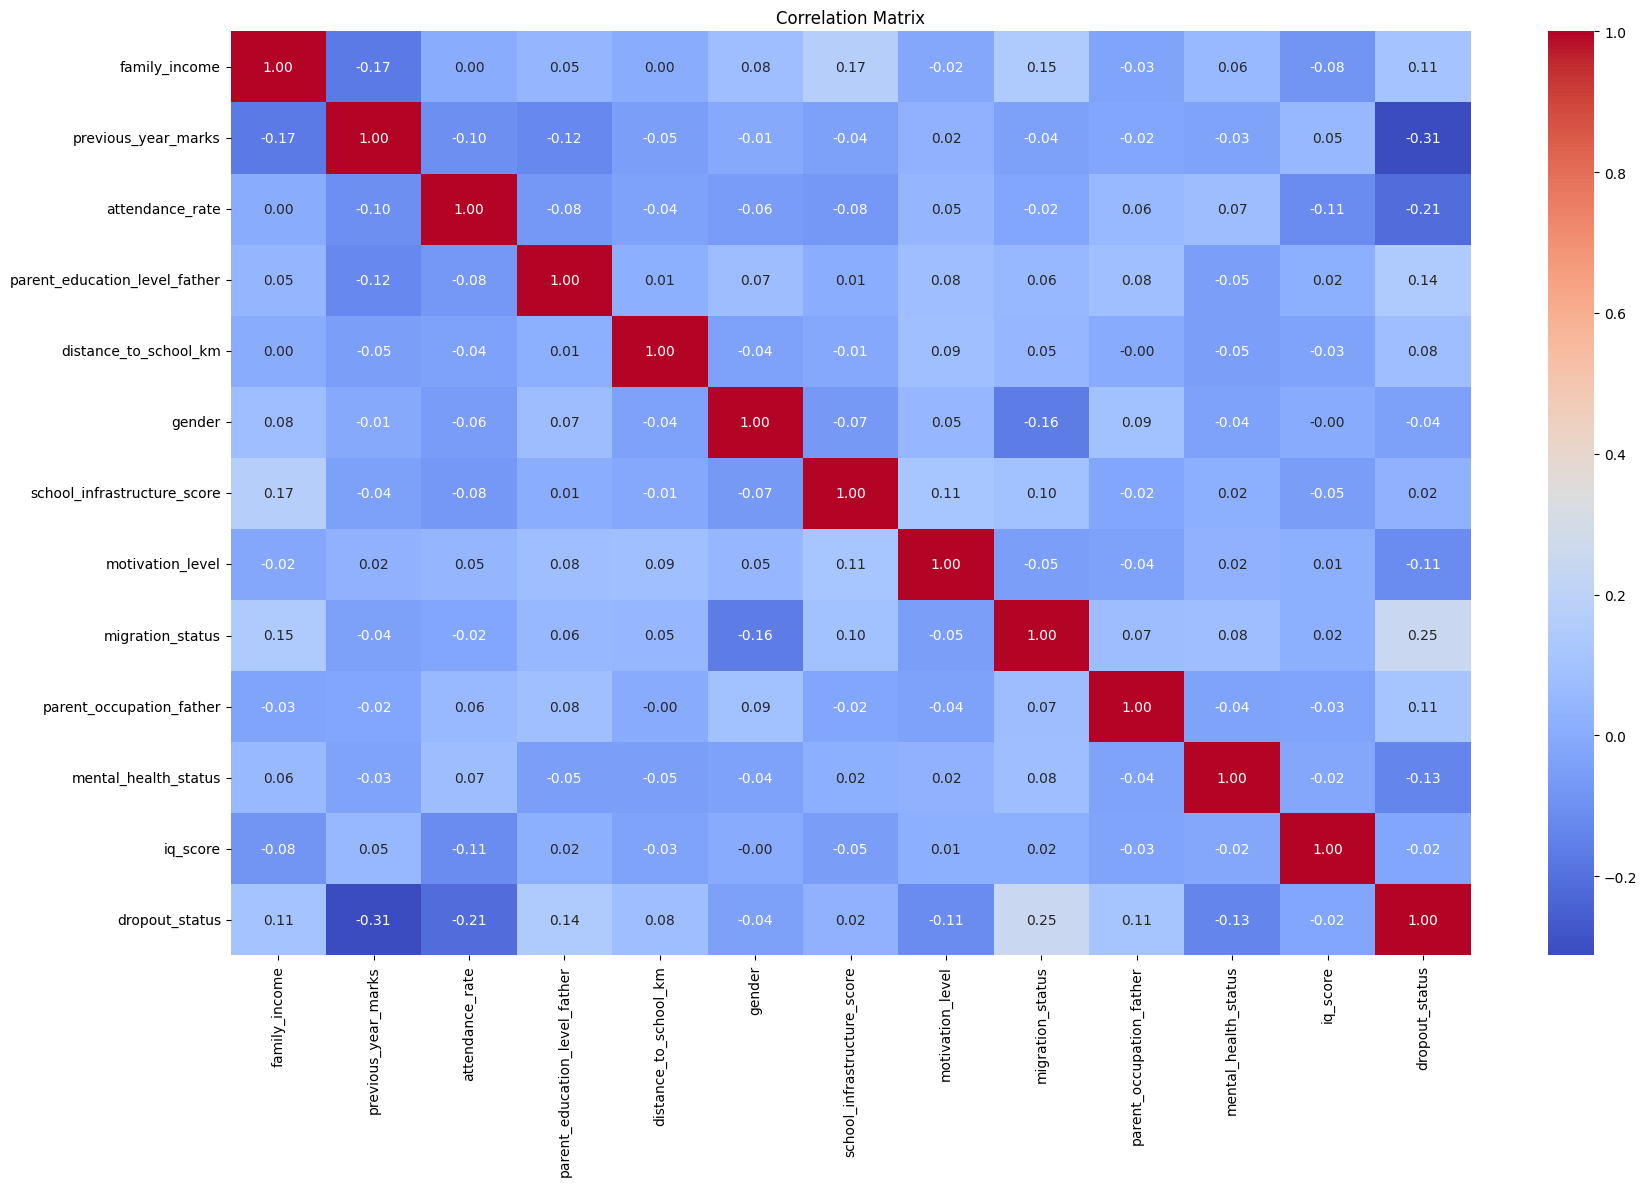

In [16]:
# Ensure all columns are numeric for correlation calculation
df_numeric = df.copy()

# Calculate and plot the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
X=df.drop("dropout_status",axis=1)
Y=df["dropout_status"]

In [22]:
Y.shape

(200,)

In [23]:
X.shape

(200, 12)

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

**Hyperparameter are decided on the basis of GridSearchCV**

In [59]:
model=RandomForestClassifier(n_estimators=200,random_state=42,max_depth=5,min_samples_split=5)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)



# Accuracy Score

In [60]:
print(accuracy_score(Y_test,y_pred))


0.775


**GridSearchCV**

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,110,120, 200, 300],
    'max_depth': [5, 10, 15,18,20],
    'min_samples_split': [2, 5, 10,12,15]
}
grid=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}


**After cross validation accuracy decreased**

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
print(scores.mean())


0.74
